# Data Analysis of used cars from eBay Kleinanzeigen

This notebook shows an exploratory data analysis of a database provided by [Kaggle](https://www.kaggle.com/]).

The dataset contains over 370,000 used cars scraped from eBay Kleinanzeigen

The dataset can be downloaded from https://www.kaggle.com/orgesleka/used-cars-database

The analysis will be driven by several questions, that will be answered through tables or graphs.

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Knowing the database

In [2]:
# Loading the dataset
dataset = pd.read_csv('dataset/autos.csv', encoding='latin-1')
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [3]:
# Print the size of dataset
print('Number of columns: {}'.format(dataset.shape[1]))
print('Number of rows: {}'.format(dataset.shape[0]))

Number of columns: 27
Number of rows: 313687


In [4]:
# Column names and data type (string, int, float, etc.)
dataset.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration    object
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
yearOfCreation          int64
yearCrawled             int64
monthOfCreation        object
monthCrawled           object
NoOfDaysOnline          int64
NoOfHrsOnline           int64
yearsOld                int64
monthsOld               int64
dtype: object

### 1) What is the distribution of vehicles by the year of registration?

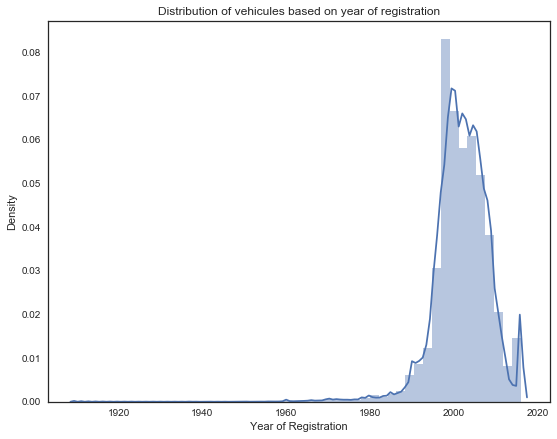

In [5]:
# Creates a plot with the distribution of vehicules based on year of registration
fig, ax = plt.subplots(figsize=(9,7))
sns.distplot(dataset['yearOfRegistration'], ax=ax)
ax.set_title('Distribution of vehicules based on year of registration')
plt.ylabel('Density')
plt.xlabel('Year of Registration')
plt.show()

 To complement the plot above we can see the frequency of car by years in the table below:

In [6]:
bins = list(range(1900,2021,10))
out = pd.cut(dataset.yearOfRegistration, bins=bins)
counts = pd.value_counts(out)

print('YEAR INTERVAL\tFREQUENCY')
print(counts)

YEAR INTERVAL	FREQUENCY
(2000, 2010]    166915
(1990, 2000]    113829
(2010, 2020]     21228
(1980, 1990]      8172
(1970, 1980]      2171
(1960, 1970]       919
(1950, 1960]       274
(1900, 1910]       100
(1940, 1950]        36
(1930, 1940]        27
(1920, 1930]        13
(1910, 1920]         3
Name: yearOfRegistration, dtype: int64


From the plot and table above we can see that the marjority of cars are from the years 1990 to 2010.

### 2) What is the Variation of the price range by type of vehicle?

For this analysis we will create a Boxplot that shows the variation and outliers (atypical value).

The figure below explain the information provided by a boxplot.

![title](images/boxplot.png)

Once we understand the boxplot, we can see the boxplots for the price range for each type of vehicle.

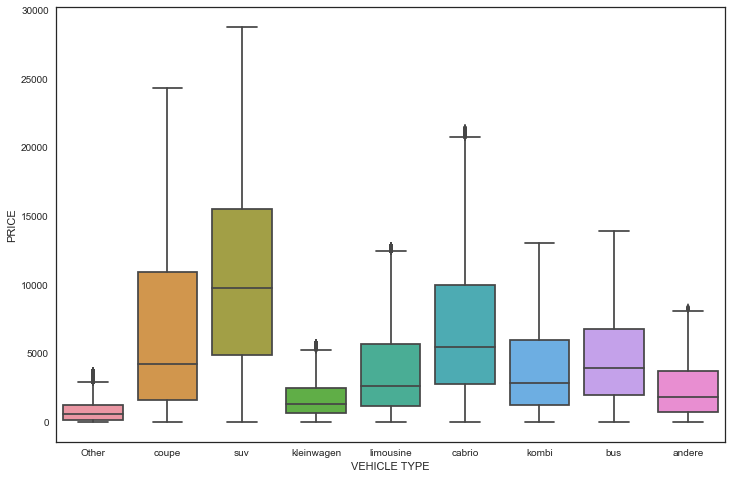

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='vehicleType', y='price', data=dataset)
ax.set_xlabel('VEHICLE TYPE')
ax.set_ylabel('PRICE')
plt.show()

From the figure above, we can see, for example, that the median value of an SUV is 10,000, with most values between 5000 and 15000, and the maximum price is something close to 30,000.

Also, we can see that _kleinwagen_ and _andere_ are the types of cars with the lowest price range.

### 3) What is the number of vehicles for selling by type of vehicle?

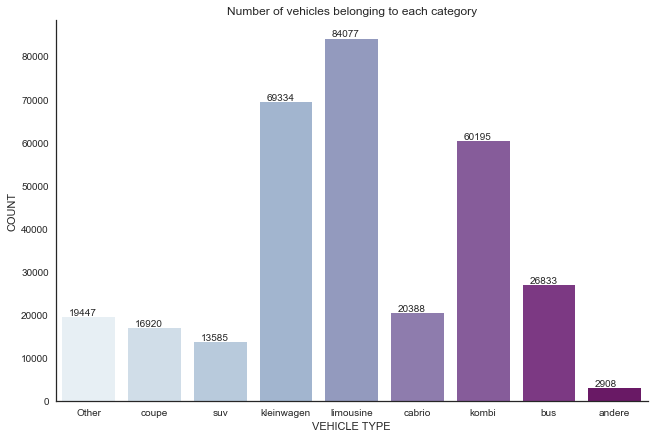

In [24]:
# Create a count plot that shows the number of vehicles belonging to each category
g = sns.factorplot(x='vehicleType', data=dataset, kind='count', size=6, aspect=1.5, palette="BuPu")
g.set_xlabels('VEHICLE TYPE')
g.set_ylabels('COUNT')
g.ax.set_title('Number of vehicles belonging to each category')

# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

From the figure above we see that the _limousine_ is the top type of car for selling, and the _andere_ has the least amount of cars for sale.

### 4) ???